# TMALL Global-Analyze business model of cross-border e-commerce leader

## Ⅰ. Program Background

TMALL Global was founded in February 2014. According to statistics, its overseas purchase market share ranks first with 32.3%. In September this year, its parent company, Alibaba, acquired Netease Koala, which ranked second in market share, and ended the competition between the two cross-border e-commerce platforms.The complementary infrastructure and information between the two will undoubtedly further consolidate Tmall Global's leading position in the cross-border e-commerce market.

## Ⅱ. Program Instruction

This project is based on the big data of Tmall Global's platform. Starting from the product data of beauty, care, health care, luggage, digital products and other categories, it interprets the sales characteristics and business model of Tmall, explores its core competitiveness, as well as future Consumption trends in the international e-commerce market.

### Preparation Dataset：
* 天猫国际商品信息.xlsx (Product Information)
* 天猫国际收藏及评分字段.xlsx (Ratings)
* 天猫国际商品评论.csv (Comments)

## Ⅲ. Program Detailed Instruction

## 1. Data Cleansing and Manipulation

#### 1.1 Importing Dataset 

In [1]:
# Import your library (tips:pandas,numpy etc.)
import pandas as pd
import numpy as np

In [2]:
# Import 天猫国际商品信息.xlsx dataset (tips:Windows users need to add 'r' before your filepath: pd.read_excel(r'filepath') 
data1=pd.read_excel(r'F:\BaiduNetdiskDownload\天猫国际商品信息.xlsx')

In [3]:
# Using .info() to view the basic information and over view of the dataset (tips: to see which columns have missing values)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16308 entries, 0 to 16307
Data columns (total 13 columns):
爬取链接(__url)                   16308 non-null object
商品ID(product_id)              16308 non-null int64
商品名称(name)                    16308 non-null object
商品描述(description)             10318 non-null object
商品现价(current_price)           16308 non-null object
商品原价(original_price)          16308 non-null object
参考销量(sales_count)             16308 non-null int64
评论数(comments_count)           16308 non-null int64
发货地址(shipping_address)        16308 non-null object
发货时间(product_publish_time)    16308 non-null int64
商品库存(stock)                   16308 non-null int64
店铺名称(shop_name)               16308 non-null object
类别(kind)                      16308 non-null object
dtypes: int64(5), object(8)
memory usage: 1.7+ MB


In [4]:
#Using .head() to view first five rows of the dataset
data1.head()

,爬取链接(__url),商品ID(product_id),商品名称(name),商品描述(description),商品现价(current_price),商品原价(original_price),参考销量(sales_count),评论数(comments_count),发货地址(shipping_address),发货时间(product_publish_time),商品库存(stock),店铺名称(shop_name),类别(kind)
0,https://detail.tmall.com/item.htm?id=542805855272,542805855272,Lansinoh兰思诺婴幼儿奶瓶160ml+宝宝硅胶奶嘴中流量2只装,防胀气设计 呵护宝宝肠胃 促进口型发育,99,134.00,0,1,浙江杭州,1571022362,236,lansinoh海外旗舰店,奶瓶
1,https://detail.tmall.com/item.htm?id=599155889147,599155889147,MK女包2019年新款MERCER迷你MK风琴包锁头单肩斜跨锁头包,NaN,1299,2999.00,10,10,香港九龙,1571129064,44,xiangyun海外专营店,品牌箱包
2,https://detail.tmall.com/item.htm?id=584024413363,584024413363,G`DAY baby儿童内裤平角纯色短裤婴儿贴身内裤纯棉四角清爽透气,NaN,155,193.00,0,4,香港香港岛,1570593945,545,微微笑海外专营店,内衣
3,https://detail.tmall.com/item.htm?id=602804327696,602804327696,德国直邮PearlCo博尔德滤水壶净水器净水壶家用过滤水壶3L一壶1芯,NaN,115,138.00,0,0,德国,1570589262,20,天猫国际欧洲直购,净水器
4,https://detail.tmall.com/item.htm?id=600100884078,600100884078,韩国正品itsskin伊思BB霜CC遮瑕保湿祛痘隔离持久提亮官网旗舰店,NaN,99,209.00,16,16,河南郑州,1570622400,40,升誉海外专营店,BB霜


In [5]:
#Using .describe() to statistically view the dataset (tips:to see which category is numeric)


In [6]:
# import  天猫国际收藏及评分字段.xlsx dataset
data2=pd.read_excel(r'F:\BaiduNetdiskDownload\天猫国际收藏及评分字段.xlsx')

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16577 entries, 0 to 16576
Data columns (total 3 columns):
id    16577 non-null int64
人气    16577 non-null object
评分    16577 non-null object
dtypes: int64(1), object(2)
memory usage: 388.6+ KB


In [8]:
# merge the above datasets (tips:using on='id',watch out if they are the same!!)
data=pd.merge(data1,data2,left_on='商品ID(product_id)',right_on='id')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16307 entries, 0 to 16306
Data columns (total 16 columns):
爬取链接(__url)                   16307 non-null object
商品ID(product_id)              16307 non-null int64
商品名称(name)                    16307 non-null object
商品描述(description)             10318 non-null object
商品现价(current_price)           16307 non-null object
商品原价(original_price)          16307 non-null object
参考销量(sales_count)             16307 non-null int64
评论数(comments_count)           16307 non-null int64
发货地址(shipping_address)        16307 non-null object
发货时间(product_publish_time)    16307 non-null int64
商品库存(stock)                   16307 non-null int64
店铺名称(shop_name)               16307 non-null object
类别(kind)                      16307 non-null object
id                            16307 non-null int64
人气                            16307 non-null object
评分                            16307 non-null object
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [10]:
# delete 'id' column, keep 商品ID(product_id)

In [11]:
data=data.drop(columns=['id'])

In [12]:
# Rename the columns name and delete Chinese (tips: using .columns on original dataset and copy paste to create new column names)

In [13]:
data.columns

Index(['爬取链接(__url)', '商品ID(product_id)', '商品名称(name)', '商品描述(description)',
       '商品现价(current_price)', '商品原价(original_price)', '参考销量(sales_count)',
       '评论数(comments_count)', '发货地址(shipping_address)',
       '发货时间(product_publish_time)', '商品库存(stock)', '店铺名称(shop_name)',
       '类别(kind)', '人气', '评分'],
      dtype='object')

In [14]:
data.columns=['url', 'product_id', 'product_name', 'product_description',
       'current_price', 'original_price', 'sales_count',
       'comments_count', 'shipping_address',
       'product_publish_time', 'stock', 'shop_name',
       'product_kind', 'popularity', 'rating']

In [15]:
data.columns

Index(['url', 'product_id', 'product_name', 'product_description',
       'current_price', 'original_price', 'sales_count', 'comments_count',
       'shipping_address', 'product_publish_time', 'stock', 'shop_name',
       'product_kind', 'popularity', 'rating'],
      dtype='object')

#### 1.2 Handling Missing Values

In [16]:
# Handling 'Product Description' missing value (using.isnull() on this column and check out why it's missing)
data.isnull().sum()

url                        0
product_id                 0
product_name               0
product_description     5989
current_price              0
original_price             0
sales_count                0
comments_count             0
shipping_address           0
product_publish_time       0
stock                      0
shop_name                  0
product_kind               0
popularity                 0
rating                     0
dtype: int64

In [17]:
# Try to fill teh NaN using .fillna() method and fill it with 'No Description' we can check it out by creating wordcloud afterwards
data['product_description']=data['product_description'].fillna('No Description')

In [18]:
data.isnull().sum()

url                     0
product_id              0
product_name            0
product_description     0
current_price           0
original_price          0
sales_count             0
comments_count          0
shipping_address        0
product_publish_time    0
stock                   0
shop_name               0
product_kind            0
popularity              0
rating                  0
dtype: int64

#### 1.3 Data Manipulation

In [19]:
# Transform Current Price and Original Price to a range like 300-400,500-600
# But we first need to manipulate them to float format since some are already range format
# After we change them into numeric value then we can transform them into price range

In [20]:
data['current_price']

0                99
1              1299
2               155
3               115
4                99
5                66
6                33
7                99
8                36
9               199
10               30
11               38
12              240
13               91
14               98
15               91
16               98
17               36
18               30
19               30
20               30
21               33
22               81
23              102
24              135
25               69
26               82
27               82
28              162
29              270
            ...    
16277            89
16278            58
16279            55
16280          1600
16281           186
16282           328
16283       510-840
16284           720
16285          1290
16286           689
16287            66
16288            92
16289        69-198
16290           218
16291          84.5
16292            48
16293            75
16294           138
16295            40


In [21]:
# you can create a loop to transform the current price to numeric value or define a formula,this answersheet I just provide the first one

In [22]:
current_p=[]
for i in data['current_price']:
    L=i.split('-')
    L=[float(i) for i in L]
    S=np.mean(L)
    current_p.append(S)

In [23]:
data['current_price']=current_p

In [24]:
original_p=[]
for i in data['original_price']:
    L=i.split('-')
    L=[float(i) for i in L]
    S=np.mean(L)
    original_p.append(S)

In [25]:
data['original_price']=original_p

In [26]:
data.describe()

,product_id,current_price,original_price,sales_count,comments_count,product_publish_time,stock
count,1.630700e+04,16307.000000,16307.000000,16307.000000,1.630700e+04,1.630700e+04,1.630700e+04
mean,5.598903e+11,765.410573,1040.187703,585.487398,2.561901e+03,1.570899e+09,7.827493e+03
std,9.360296e+10,2358.653720,2607.112716,5032.212540,1.821444e+04,2.507004e+05,1.397295e+05
min,5.557058e+09,0.000000,9.000000,0.000000,0.000000e+00,1.569982e+09,0.000000e+00
25%,5.577773e+11,110.000000,188.000000,2.000000,5.000000e+00,1.570717e+09,4.500000e+01
50%,5.788387e+11,218.000000,349.000000,16.000000,6.000000e+01,1.570946e+09,3.490000e+02
75%,5.957869e+11,589.000000,850.000000,173.000000,6.220000e+02,1.571110e+09,2.321500e+03
max,6.056921e+11,96500.000000,96500.000000,361847.000000,1.028641e+06,1.573214e+09,1.106615e+07


In [27]:
#creating a formula to deal with unexpected range 
def mean_price(s):
    L=s.split('-')#split the occasional range format into an array and store in L, notice these numbers are string format now!! c
    L=[float(i) for i in L]#change the string format into numeric values using a for loop!
    return np.mean(L) #compute these two numbers mean by using np.mean()

##watch out: when we want to compute the mean of list of numbers we should apply np.mean() not mean()!!
#here is a wrong example: 
#L=[1,2,3,4,5] 
#L.mean() will return an error but np.mean(L) won't, remember to watch out these tiny differneces.

In [28]:
# apply this formula on current price 


In [29]:
# apply this formula on original price


In [30]:
# Dealing with price=0 product, check out if there is any product's price equal to zero
data[data['current_price']==0]

,url,product_id,product_name,product_description,current_price,original_price,sales_count,comments_count,shipping_address,product_publish_time,stock,shop_name,product_kind,popularity,rating
106,https://detail.tmall.com/item.htm?id=603277549088,603277549088,德国进口内置隐形棉条卫生巾月经杯棉棒姨妈大流量游泳啪啪日夜用,No Description,0.0,674.00,0,0,丹麦,1570253778,0,sinful海外旗舰店,姨妈巾,['4'],['0']
2433,https://detail.tmall.com/item.htm?id=42488472063,42488472063,新加坡Goldkili金麒麟金祥麟进口即溶即食营养袋装原味冲饮熟麦片,包邮 20包 600g,0.0,101.69,0,83,新加坡,1571028160,0,sayang海外专营店,冲饮麦片,['227'],['5']
6893,https://detail.tmall.com/item.htm?id=536860174022,536860174022,美国进口普丽普莱秘鲁玛卡胶囊 玛咖 男性持久保健品生精 片60粒,降妻利器 草本配方 秘鲁玛卡,0.0,199.00,0,65,美国,1571033450,0,普丽普莱健生湾海外专卖店,玛咖,['166'],['4.8']
7240,https://detail.tmall.com/item.htm?id=585206613959,585206613959,德国爱他美进口婴儿配方奶粉易乐罐Pre段0-6个月龄800g罐装,No Description,0.0,180.00,0,935,浙江杭州,1570505574,0,天猫国际进口超市,牛奶粉,['2882'],['4.8']
11138,https://detail.tmall.com/item.htm?id=575005176150,575005176150,【直营】好奇魔法成长裤韩国进口L号女宝40片 贴身防漏尿不湿,全方位贴身设计，怎么动都舒服,0.0,115.00,0,29,浙江宁波,1571033311,0,天猫国际进口超市,拉拉裤,['61'],['4.9']
14312,https://detail.tmall.com/item.htm?id=544555596608,544555596608,日本进口柠檬酵素Veggie Dell生姜果蔬孝素粒夜间清肠排宿便120粒,清除宿便 排除毒素,0.0,399.00,0,401,日本,1571275016,0,元宗园保健品海外专营店,酵素,['1260'],['4.8']
14664,https://detail.tmall.com/item.htm?id=564730697292,564730697292,法国进口朗丽湖城堡干红葡萄酒原装进口2015/2016国庆送礼,法国名庄原装进口收藏送礼,0.0,899.00,0,171,浙江杭州,1571058714,0,天猫国际进口超市,酒,['239'],['5']


In [31]:
data=data[data['current_price']!=0]

In [32]:
data.describe()

,product_id,current_price,original_price,sales_count,comments_count,product_publish_time,stock
count,1.630000e+04,16300.000000,16300.000000,16300.000000,1.630000e+04,1.630000e+04,1.630000e+04
mean,5.599189e+11,765.739277,1040.476883,585.738834,2.562898e+03,1.570899e+09,7.830855e+03
std,9.353413e+10,2359.106807,2607.628375,5033.278396,1.821829e+04,2.506574e+05,1.397594e+05
min,5.557058e+09,9.000000,9.000000,0.000000,0.000000e+00,1.569982e+09,0.000000e+00
25%,5.577798e+11,110.000000,188.000000,2.000000,5.000000e+00,1.570717e+09,4.500000e+01
50%,5.788398e+11,218.750000,349.000000,16.000000,6.000000e+01,1.570946e+09,3.490000e+02
75%,5.957872e+11,589.000000,850.000000,173.000000,6.220000e+02,1.571110e+09,2.325000e+03
max,6.056921e+11,96500.000000,96500.000000,361847.000000,1.028641e+06,1.573214e+09,1.106615e+07


In [33]:
# Method 1: You can find the original price according to the url

In [34]:
#tm_data.loc[106,'商品现价']=539.00

In [35]:
#tm_data.loc[2433,'商品现价']=53

In [36]:
# Method 2, considering there are not so many 0 values, we could just drop them and make things much easier!

In [37]:
#tm_data =tm_data[tm_data['商品现价']!=0]

In [38]:
#when you drop out some values in your dataframe, you need to rearrange your index using: data.index=range(len(data))
#first using tail() method to check out the index is indeed false
data.index=range(len(data))

In [39]:
data.tail()

,url,product_id,product_name,product_description,current_price,original_price,sales_count,comments_count,shipping_address,product_publish_time,stock,shop_name,product_kind,popularity,rating
16295,https://detail.tmall.com/item.htm?id=599344473399,599344473399,Vogel's 沃格尔麦片果仁味谷物早餐营养混合坚果燕麦片400g*2盒,No Description,115.0,198.0,9,9,浙江宁波,1571207601,56,metcash官方海外旗舰店,冲饮麦片,['19'],['5']
16296,https://detail.tmall.com/item.htm?id=601607765841,601607765841,日本直邮 TIGER虎牌男女儿童杯小学生户外轻便携保温杯水壶600ml,No Description,319.0,383.0,25,25,日本,1571384024,76,天猫国际海外仓直购,保温杯,['93'],['4.5']
16297,https://detail.tmall.com/item.htm?id=557945833172,557945833172,韩国Aromatica晒后修复95%芦荟修护凝胶300ml 保湿补水睡眠面膜,芦荟凝胶,89.0,124.0,72,181,韩国,1571289774,1082,oliveyoung海外旗舰店,乳液面霜,['2988'],['4.8']
16298,https://detail.tmall.com/item.htm?id=560043379370,560043379370,Philips/飞利浦电吹风HP8233 恒温4倍负离子美发吹风机吹风筒,大功率 负离子滋润护发 快速智能恒温不伤发,359.0,899.0,16,121,香港香港岛,1571621154,50,跨境国际海外专营店,个人护理,['1558'],['4.7']
16299,https://detail.tmall.com/item.htm?id=560367108260,560367108260,Philips飞利浦理发器BT7215胡须造型器修剪器多功能电动刮胡子刀,可调节长度 刀片可水洗 电量显示,569.0,1299.0,12,49,香港香港岛,1571456597,28,跨境国际海外专营店,个人护理,['1340'],['5']


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [41]:
# Start changing the numeric values to a range like 300-400,500-600, you can split the range interval yourself 

In [42]:
# you can use .value_counts().sort_index() to have the current price ranging from the highest to the lowest
data_5000=data[data['current_price']<5000]
data_5000['current_price'].values


array([  99., 1299.,  155., ...,   89.,  359.,  569.])

In [43]:
data_5000['current_price'].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16288, 16289, 16291, 16292, 16294, 16295, 16296, 16297, 16298,
            16299],
           dtype='int64', length=15938)

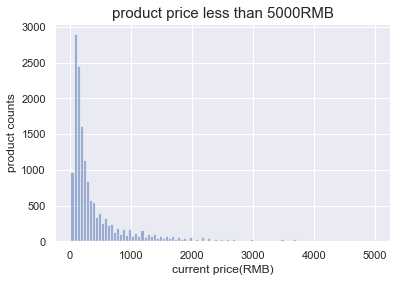

In [44]:
#then you can plot some price range using slicing method
plt.hist(data_5000['current_price'].values,bins=100,alpha=0.5)
plt.title('product price less than 5000RMB',size=15)
plt.xlabel('current price(RMB)')
plt.ylabel('product counts')
plt.show()

In [45]:
# 0-499,500-999,1000-1499,1500-1999,2000+

In [46]:
#create get_range formula
def get_level(s):
    if int(s)<499:
        return '0-499'
    elif int(s)<999:
        return '500-999'
    elif int(s)<1499:
        return '1000-1499'
    elif int(s)<1999:
        return '1500-1999'
    elif int(s)>=1999:
        return '2000+'
    else:
        return 'error'

In [47]:
# then apply it to current price and create a new dataframe

In [48]:
data['price_range']=data['current_price'].apply(get_level)

In [49]:
data

,url,product_id,product_name,product_description,current_price,original_price,sales_count,comments_count,shipping_address,product_publish_time,stock,shop_name,product_kind,popularity,rating,price_range
0,https://detail.tmall.com/item.htm?id=542805855272,542805855272,Lansinoh兰思诺婴幼儿奶瓶160ml+宝宝硅胶奶嘴中流量2只装,防胀气设计 呵护宝宝肠胃 促进口型发育,99.00,134.00,0,1,浙江杭州,1571022362,236,lansinoh海外旗舰店,奶瓶,['55'],['5'],0-499
1,https://detail.tmall.com/item.htm?id=599155889147,599155889147,MK女包2019年新款MERCER迷你MK风琴包锁头单肩斜跨锁头包,No Description,1299.00,2999.00,10,10,香港九龙,1571129064,44,xiangyun海外专营店,品牌箱包,['453'],['4.6'],1000-1499
2,https://detail.tmall.com/item.htm?id=584024413363,584024413363,G`DAY baby儿童内裤平角纯色短裤婴儿贴身内裤纯棉四角清爽透气,No Description,155.00,193.00,0,4,香港香港岛,1570593945,545,微微笑海外专营店,内衣,['9'],['5'],0-499
3,https://detail.tmall.com/item.htm?id=602804327696,602804327696,德国直邮PearlCo博尔德滤水壶净水器净水壶家用过滤水壶3L一壶1芯,No Description,115.00,138.00,0,0,德国,1570589262,20,天猫国际欧洲直购,净水器,['2'],['0'],0-499
4,https://detail.tmall.com/item.htm?id=600100884078,600100884078,韩国正品itsskin伊思BB霜CC遮瑕保湿祛痘隔离持久提亮官网旗舰店,No Description,99.00,209.00,16,16,河南郑州,1570622400,40,升誉海外专营店,BB霜,['26'],['4.5'],0-499
5,https://detail.tmall.com/item.htm?id=586738398938,586738398938,【直营】Kelloggs家乐氏 玄米谷兰诺拉水果燕麦麦片500g 免煮即食,Q萌莓果小方 可当零食吃的麦片不一样的美味,66.00,69.90,45,152,浙江宁波,1570434993,2109,天猫国际进口超市,冲饮麦片,['396'],['4.8'],0-499
6,https://detail.tmall.com/item.htm?id=599085649492,599085649492,苏菲/sofy进口尤妮佳夜用卫生巾花香1/2小口袋系列便携姨妈巾30cm,No Description,33.00,50.00,10,10,日本,1570773514,1011,苏菲海外旗舰店,姨妈巾,['6'],['5'],0-499
7,https://detail.tmall.com/item.htm?id=604534587386,604534587386,【直营】澳洲Nutri-Brex欣善怡优粹麦原味低糖全麦早餐谷物1.4kg,欢乐颂同款麦片17年新包装,99.00,99.00,2,2,浙江杭州,1570895936,13118,天猫国际美家直营,冲饮麦片,['1'],['5'],0-499
8,https://detail.tmall.com/item.htm?id=584459152757,584459152757,苏菲/sofy尤妮佳日本进口卫生巾花香超薄透气日用姨妈巾21cm*24片,No Description,36.00,50.00,5,20,日本,1571041889,1493,苏菲海外旗舰店,姨妈巾,['43'],['5'],0-499
9,https://detail.tmall.com/item.htm?id=573361080756,573361080756,VTBTS限量合作款胶原蛋白气垫BB霜持久保湿遮瑕粉底液韩国,自然遮瑕 水润持妆,199.00,399.00,23,289,浙江杭州,1570620009,2297,vt海外旗舰店,BB霜,['4189'],['4.8'],0-499


In [50]:
#Handle shipping address, only retain national, provincial and special administrative levels
pro_list = ['北京',
 '上海',
 '天津',
 '重庆',
 '河北',
 '山西',
 '内蒙古',
 '黑龙江',
 '吉林',
 '辽宁',
 '陕西',
 '甘肃',
 '青海',
 '新疆',
 '宁夏',
 '山东',
 '河南',
 '江苏',
 '浙江',
 '安徽',
 '江西',
 '福建',
 '台湾',
 '湖北',
 '湖南',
 '广东',
 '广西',
 '海南',
 '四川',
 '云南',
 '贵州',
 '西藏',
 '香港',
 '澳门'
]

In [51]:
# using get palce to change original place
def get_place(s):
    for i in pro_list:
        if i in s:
            return i
    return s
            

In [52]:
#apply this method to the place column


In [53]:
# change '海外美国' to '美国' using replace()


In [54]:
# extract the numeric score from 'popularity' ,using eval(),extracting string from list and change the string into number
pop=[eval(i) for i in data['popularity']]
popularity=[]
for i in pop:
    s=float(i[0])
    popularity.append(s)

In [55]:
data['popularity']=popularity

In [56]:
# extract the numeric score from 'rating' ,using eval(),extracting string from list and change the string into number
rate=[eval(i) for i in data['rating']]
ratings=[]
for i in rate:
    s=float(i[0])
    ratings.append(s)
data['rating']=ratings

In [57]:
data.describe()

,product_id,current_price,original_price,sales_count,comments_count,product_publish_time,stock,popularity,rating
count,1.630000e+04,16300.000000,16300.000000,16300.000000,1.630000e+04,1.630000e+04,1.630000e+04,1.630000e+04,16300.000000
mean,5.599189e+11,765.739277,1040.476883,585.738834,2.562898e+03,1.570899e+09,7.830855e+03,9.341107e+03,4.096184
std,9.353413e+10,2359.106807,2607.628375,5033.278396,1.821829e+04,2.506574e+05,1.397594e+05,6.121288e+04,1.770216
min,5.557058e+09,9.000000,9.000000,0.000000,0.000000e+00,1.569982e+09,0.000000e+00,0.000000e+00,0.000000
25%,5.577798e+11,110.000000,188.000000,2.000000,5.000000e+00,1.570717e+09,4.500000e+01,4.800000e+01,4.700000
50%,5.788398e+11,218.750000,349.000000,16.000000,6.000000e+01,1.570946e+09,3.490000e+02,4.310000e+02,4.900000
75%,5.957872e+11,589.000000,850.000000,173.000000,6.220000e+02,1.571110e+09,2.325000e+03,2.957500e+03,5.000000
max,6.056921e+11,96500.000000,96500.000000,361847.000000,1.028641e+06,1.573214e+09,1.106615e+07,4.050496e+06,5.000000


In [58]:
# create sales volume columns using current price* product comments number
data['sales']=data['current_price']*data['comments_count']

In [59]:
# create discount percentage using current price/original price
data['discount']=data['current_price']/data['original_price']

In [60]:
data.head()

,url,product_id,product_name,product_description,current_price,original_price,sales_count,comments_count,shipping_address,product_publish_time,stock,shop_name,product_kind,popularity,rating,price_range,sales,discount
0,https://detail.tmall.com/item.htm?id=542805855272,542805855272,Lansinoh兰思诺婴幼儿奶瓶160ml+宝宝硅胶奶嘴中流量2只装,防胀气设计 呵护宝宝肠胃 促进口型发育,99.0,134.0,0,1,浙江杭州,1571022362,236,lansinoh海外旗舰店,奶瓶,55.0,5.0,0-499,99.0,0.738806
1,https://detail.tmall.com/item.htm?id=599155889147,599155889147,MK女包2019年新款MERCER迷你MK风琴包锁头单肩斜跨锁头包,No Description,1299.0,2999.0,10,10,香港九龙,1571129064,44,xiangyun海外专营店,品牌箱包,453.0,4.6,1000-1499,12990.0,0.433144
2,https://detail.tmall.com/item.htm?id=584024413363,584024413363,G`DAY baby儿童内裤平角纯色短裤婴儿贴身内裤纯棉四角清爽透气,No Description,155.0,193.0,0,4,香港香港岛,1570593945,545,微微笑海外专营店,内衣,9.0,5.0,0-499,620.0,0.803109
3,https://detail.tmall.com/item.htm?id=602804327696,602804327696,德国直邮PearlCo博尔德滤水壶净水器净水壶家用过滤水壶3L一壶1芯,No Description,115.0,138.0,0,0,德国,1570589262,20,天猫国际欧洲直购,净水器,2.0,0.0,0-499,0.0,0.833333
4,https://detail.tmall.com/item.htm?id=600100884078,600100884078,韩国正品itsskin伊思BB霜CC遮瑕保湿祛痘隔离持久提亮官网旗舰店,No Description,99.0,209.0,16,16,河南郑州,1570622400,40,升誉海外专营店,BB霜,26.0,4.5,0-499,1584.0,0.473684


In [61]:
data.describe()

,product_id,current_price,original_price,sales_count,comments_count,product_publish_time,stock,popularity,rating,sales,discount
count,1.630000e+04,16300.000000,16300.000000,16300.000000,1.630000e+04,1.630000e+04,1.630000e+04,1.630000e+04,16300.000000,1.630000e+04,16300.000000
mean,5.599189e+11,765.739277,1040.476883,585.738834,2.562898e+03,1.570899e+09,7.830855e+03,9.341107e+03,4.096184,3.575277e+05,0.694225
std,9.353413e+10,2359.106807,2607.628375,5033.278396,1.821829e+04,2.506574e+05,1.397594e+05,6.121288e+04,1.770216,1.865902e+06,0.234285
min,5.557058e+09,9.000000,9.000000,0.000000,0.000000e+00,1.569982e+09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.061179
25%,5.577798e+11,110.000000,188.000000,2.000000,5.000000e+00,1.570717e+09,4.500000e+01,4.800000e+01,4.700000,1.830000e+03,0.500000
50%,5.788398e+11,218.750000,349.000000,16.000000,6.000000e+01,1.570946e+09,3.490000e+02,4.310000e+02,4.900000,1.619850e+04,0.697917
75%,5.957872e+11,589.000000,850.000000,173.000000,6.220000e+02,1.571110e+09,2.325000e+03,2.957500e+03,5.000000,1.232310e+05,0.922481
max,6.056921e+11,96500.000000,96500.000000,361847.000000,1.028641e+06,1.573214e+09,1.106615e+07,4.050496e+06,5.000000,7.887633e+07,1.345455


In [62]:
# save the file in Excel

#### 1.3 Dealing with comments dataset

In [63]:
# clean and tidy, nothing need to handle in the first place

## 2. Visualization

#### 2.1 Tableau viz

* Changed the number of reviews to total sales



#### Shipping address has many dimensions to analyze and study，such as
* Bar chart of the number of records for different shipping addresses, excluding addresses with less than 100 records
* Bar chart of comparative analysis of merchandise sales at the place of shipment, take the top 15
* Create a group by right-clicking the shipping address, create 3 regional categories of mainland, Hong Kong, Macao and Taiwan


#### Commodity category analysis
* Analysis of sales of different categories of goods(Tree Map)
* Double-axis plot of sales versus sales of different categories of goods
* Average inventory of different categories of goods


#### Shop Analysis
* Top 10 stores sales bar chart
* Stacked bar chart of the 10 best-selling stores
* Comparison of the average discount strength of the 10 stores with the highest sales


#### Single product analysis
* Most Popular Products TOP10
* Top 10 most sold products
* Top 10 most popular products
* Top 10 products in stock



#### Mixed Analysis 
* Analysis of the distribution of scores (moving the score from the measure to the dimension, excluding the data column with a score of 0)
* Composition pie chart of the number of product records and sales by price level



#### 2.2. Making WordCloud using WordArt https://wordart.com/
* Products Description
* Products shipping address

# #Congratulations! YOU HAVE FINISHED COMPULSORY SECTION OF THIS PROGRAM AND YOU MATSER THE BASIC SKILLS TO BE A DATA ANALYST

# #Below is for your choice-you cloud learn more about machine learning related courses in datacamp and try to make your own predictions

## 3.Predictive Analytics（supervised learning: multi-linear regression）

#### 3.1 Building Model

Using total sales volume as y,'current price','original price','inventory','popularity','rating','discounts','sales'as factors(X)

In [64]:
#import dataset you have cleaned above

In [65]:
# mapping seaborn

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# Standardized the factors

In [73]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
data.columns

Index(['url', 'product_id', 'product_name', 'product_description',
       'current_price', 'original_price', 'sales_count', 'comments_count',
       'shipping_address', 'product_publish_time', 'stock', 'shop_name',
       'product_kind', 'popularity', 'rating', 'price_range', 'sales',
       'discount'],
      dtype='object')

In [141]:
X=data[['discount','popularity','rating','current_price', 'original_price','sales','stock']]
y=data['comments_count']
scaled_X=std.fit_transform(X)

In [161]:
len(X.columns)

7

In [142]:
# Train_test_split
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,random_state=42,test_size=0.2)

In [144]:
#Linear_model
from sklearn.linear_model import LinearRegression

In [145]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
#Making Predictions on test size

In [147]:
lr.predict(X_test)

array([ 423.04390262, 1919.28238894,  503.64556735, ..., -204.81292153,
        945.26603146, -209.71269424])

In [148]:
#Calculate the accuracy score on test_size to see how your model performs

In [149]:
lr.score(X_test,y_test)

0.758797570983863

In [150]:
from sklearn.model_selection import cross_val_score
cv_results=cross_val_score(lr,scaled_X,y,cv=5)

In [151]:
cv_results

array([0.83715403, 0.59337615, 0.4294224 , 0.76660537, 0.83243785])

In [152]:
np.mean(cv_results)

0.6917991619453719

In [153]:
#用Applied Ridge Regression
from sklearn.linear_model import Ridge

In [154]:
ridge=Ridge()

In [155]:
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [156]:
ridge.score(X_test,y_test)

0.7587796342275455

In [157]:
#Applied Lasso for feature selection
from sklearn.linear_model import Lasso

In [158]:
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [159]:
lasso.score(X_test,y_test)

0.7587827519232886

In [160]:
lasso_coef=lasso.fit(X,y).coef_

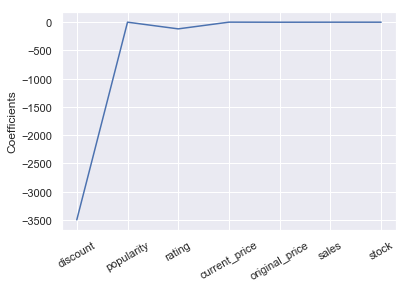

In [163]:
plt.plot(range(len(X.columns)),lasso_coef)
plt.xticks(range(len(X.columns)),X.columns,rotation=30)
plt.ylabel('Coefficients')
plt.show()

In [165]:
lr_=lr.fit(data[['discount']],y)

In [179]:
y_c=data[data['comments_count']<20000]
#y_c['comments_count']

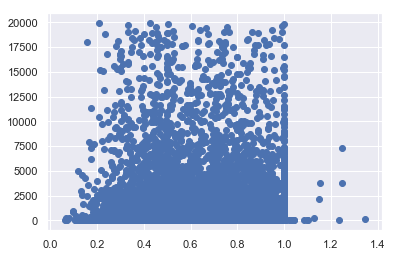

In [180]:
plt.scatter(y_c['discount'],y_c['comments_count'])

In [ ]:
#Using KMeans to group lables

In [193]:
from sklearn.cluster import KMeans

In [242]:
#find the best clusters
clusters=range(1,9)
inertias=[]
for i in clusters:
    model=KMeans(n_clusters=i)
    model.fit(scaled_X)
    inertias.append(model.inertia_)

In [243]:
len(inertias)

8

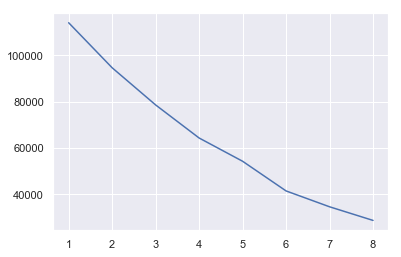

In [244]:
plt.plot(clusters,inertias)
plt.show()

In [255]:
model_=KMeans(n_clusters=6)

In [256]:
model_.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [257]:
group=model_.predict(scaled_X)

In [258]:
from collections import Counter

In [259]:
Counter(group)

Counter({3: 6713, 0: 6930, 1: 2492, 2: 104, 4: 57, 5: 4})

In [260]:
data['prediction_label']=group

In [261]:
data

,url,product_id,product_name,product_description,current_price,original_price,sales_count,comments_count,shipping_address,product_publish_time,stock,shop_name,product_kind,popularity,rating,price_range,sales,discount,prediction_label
0,https://detail.tmall.com/item.htm?id=542805855272,542805855272,Lansinoh兰思诺婴幼儿奶瓶160ml+宝宝硅胶奶嘴中流量2只装,防胀气设计 呵护宝宝肠胃 促进口型发育,99.00,134.00,0,1,浙江杭州,1571022362,236,lansinoh海外旗舰店,奶瓶,55.0,5.0,0-499,99.00,0.738806,3
1,https://detail.tmall.com/item.htm?id=599155889147,599155889147,MK女包2019年新款MERCER迷你MK风琴包锁头单肩斜跨锁头包,No Description,1299.00,2999.00,10,10,香港九龙,1571129064,44,xiangyun海外专营店,品牌箱包,453.0,4.6,1000-1499,12990.00,0.433144,0
2,https://detail.tmall.com/item.htm?id=584024413363,584024413363,G`DAY baby儿童内裤平角纯色短裤婴儿贴身内裤纯棉四角清爽透气,No Description,155.00,193.00,0,4,香港香港岛,1570593945,545,微微笑海外专营店,内衣,9.0,5.0,0-499,620.00,0.803109,3
3,https://detail.tmall.com/item.htm?id=602804327696,602804327696,德国直邮PearlCo博尔德滤水壶净水器净水壶家用过滤水壶3L一壶1芯,No Description,115.00,138.00,0,0,德国,1570589262,20,天猫国际欧洲直购,净水器,2.0,0.0,0-499,0.00,0.833333,1
4,https://detail.tmall.com/item.htm?id=600100884078,600100884078,韩国正品itsskin伊思BB霜CC遮瑕保湿祛痘隔离持久提亮官网旗舰店,No Description,99.00,209.00,16,16,河南郑州,1570622400,40,升誉海外专营店,BB霜,26.0,4.5,0-499,1584.00,0.473684,0
5,https://detail.tmall.com/item.htm?id=586738398938,586738398938,【直营】Kelloggs家乐氏 玄米谷兰诺拉水果燕麦麦片500g 免煮即食,Q萌莓果小方 可当零食吃的麦片不一样的美味,66.00,69.90,45,152,浙江宁波,1570434993,2109,天猫国际进口超市,冲饮麦片,396.0,4.8,0-499,10032.00,0.944206,3
6,https://detail.tmall.com/item.htm?id=599085649492,599085649492,苏菲/sofy进口尤妮佳夜用卫生巾花香1/2小口袋系列便携姨妈巾30cm,No Description,33.00,50.00,10,10,日本,1570773514,1011,苏菲海外旗舰店,姨妈巾,6.0,5.0,0-499,330.00,0.660000,0
7,https://detail.tmall.com/item.htm?id=604534587386,604534587386,【直营】澳洲Nutri-Brex欣善怡优粹麦原味低糖全麦早餐谷物1.4kg,欢乐颂同款麦片17年新包装,99.00,99.00,2,2,浙江杭州,1570895936,13118,天猫国际美家直营,冲饮麦片,1.0,5.0,0-499,198.00,1.000000,3
8,https://detail.tmall.com/item.htm?id=584459152757,584459152757,苏菲/sofy尤妮佳日本进口卫生巾花香超薄透气日用姨妈巾21cm*24片,No Description,36.00,50.00,5,20,日本,1571041889,1493,苏菲海外旗舰店,姨妈巾,43.0,5.0,0-499,720.00,0.720000,3
9,https://detail.tmall.com/item.htm?id=573361080756,573361080756,VTBTS限量合作款胶原蛋白气垫BB霜持久保湿遮瑕粉底液韩国,自然遮瑕 水润持妆,199.00,399.00,23,289,浙江杭州,1570620009,2297,vt海外旗舰店,BB霜,4189.0,4.8,0-499,57511.00,0.498747,0


In [263]:
data.groupby('prediction_label')[['discount','popularity','rating','current_price', 'original_price','sales','stock']].mean().T


prediction_label,0,1,2,3,4,5
discount,0.476243,0.812714,0.915493,0.872125,6.865805e-01,3.244253e-01
popularity,8445.753680,23.849920,1574.807692,7938.974825,6.989660e+05,9.308875e+04
rating,4.851602,0.014366,2.152885,4.855147,4.817544e+00,4.825000e+00
current_price,363.189463,1434.941910,21892.871154,610.118754,2.800447e+02,5.591250e+01
original_price,781.439848,1747.410803,23798.289423,699.031553,3.735333e+02,2.337500e+02
sales,319352.741199,863.926075,176949.949327,337354.678256,2.318959e+07,1.890577e+06
stock,7877.022799,481.885233,27.259615,5309.939073,7.452160e+04,7.989530e+06
